In [1]:
import numpy as np
from scipy import stats

In [3]:
stats.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.08222258891386608

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('pines.txt', sep='\t')

In [8]:
df.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

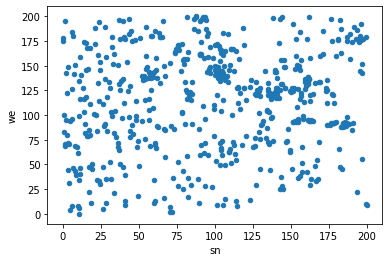

In [13]:
df.plot.scatter(x='sn', y='we')

In [16]:
x=np.array(df['sn'])
y=np.array(df['we'])

#print(np.array(df['sn']))

In [55]:
binx=np.linspace(0, 200, 6)
biny=np.linspace(0, 200, 6)

In [56]:
binx

array([  0.,  40.,  80., 120., 160., 200.])

In [57]:
ret=stats.binned_statistic_2d(x, y, x, 'count', bins=[binx, biny])
matrix=ret.statistic

In [58]:
np.mean(matrix)

23.36

In [59]:
matrix.shape

(5, 5)

In [60]:
# Равномерное распределение
cons=np.array([np.mean(matrix)]*(5**2))

In [61]:
len(cons)

25

In [63]:
stats.chisquare(matrix.reshape(25), cons, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

Рассчитаем количество клеток с данным количеством деревьев

In [45]:
observed_frequences = np.bincount(np.int_(matrix).reshape(1600))
print(observed_frequences)

[1193  304   72   12    7    3    6    3]


In [53]:
observed_frequences.shape

(8,)

In [48]:
expected_frequences=np.array([1600]+[0]*7)

In [54]:
expected_frequences.shape

(8,)

In [49]:
stats.chisquare(observed_frequences, expected_frequences, ddof = 0)

C:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:4653: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)

In [52]:
len(df)/1600

0.365